# Solving the n-Queens Problem using Local Search

Student Name: Ethan Chou

I have used the following AI tools: OpenAI

I understand that my submission needs to be my own work: EC

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


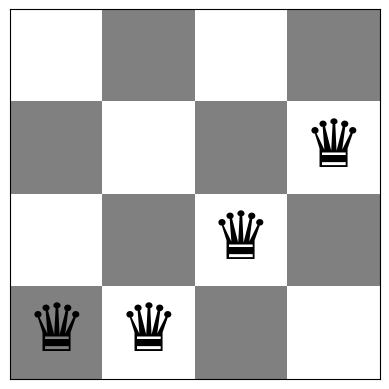

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [38]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


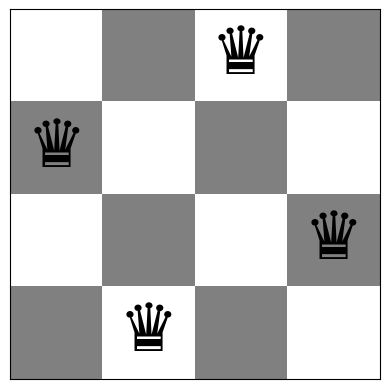

In [41]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Board with 8 conflicts.


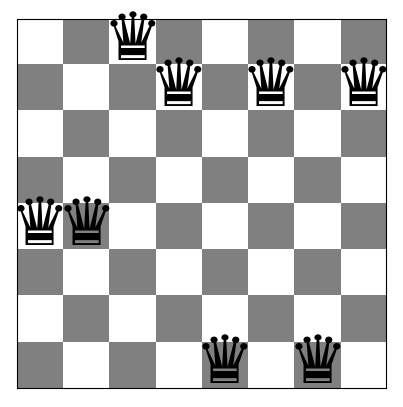

Queens (left to right) are at rows: [4 4 0 1 7 1 7 1]
Number of conflicts: 8


Board with 0 conflicts.


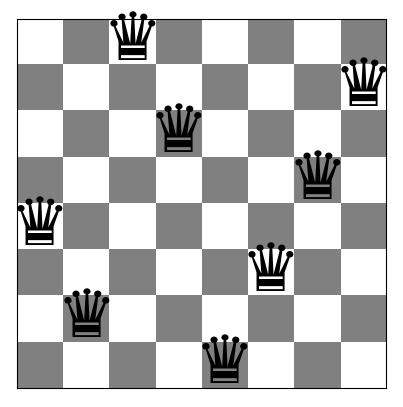

Queens (left to right) are at rows: [4 6 0 2 7 5 3 1]
Number of conflicts: 0


In [45]:
# Code and description go here
def steepest_ascend(board):
    current_board = board
    conflict = conflicts(current_board)
    no_conflicts = False

    while not no_conflicts:

        #Optimal solution = no conflicts
        #Or if board already has no conflicts
        if(conflicts(current_board) == 0):
            return current_board

        move = current_board.copy()
        for column in range (len(board)):
            for row in range (len(board)):
                if(current_board[column] == row):
                    continue
                new_board = current_board.copy()
                new_board[column] = row
                if (conflicts(new_board) < conflicts(move)):
                    move = new_board

        #If there is no better outcome
        if (conflicts(move) >= conflict):
            no_conflicts = True

        current_board = move
        conflict = conflicts(current_board)

    return current_board



board = random_board(8)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = steepest_ascend(board)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Board with 8 conflicts.


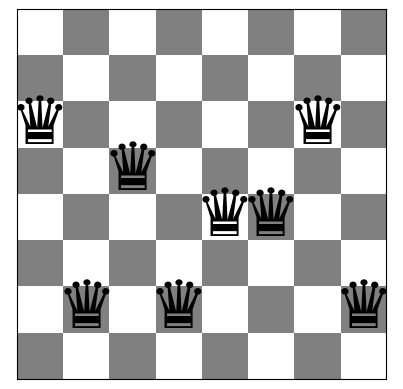

Queens (left to right) are at rows: [2 6 3 6 4 4 2 6]
Number of conflicts: 8


Board with 1 conflicts.


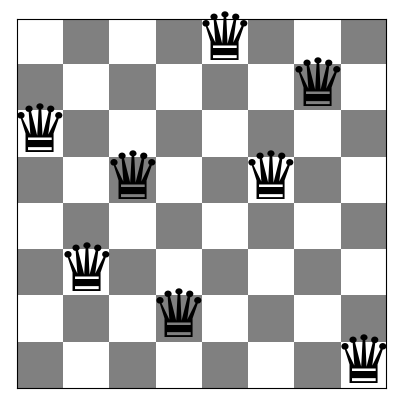

Queens (left to right) are at rows: [2 5 3 6 0 3 1 7]
Number of conflicts: 1


In [48]:
# Code and description go here
import random
def stochastic_hill_climb(board):
    current_board = board
    conflict = conflicts(current_board)
    no_conflicts = False

    while not no_conflicts:

        #Optimal solution = no conflicts
        #Or if board already has no conflicts
        if(conflicts(current_board) == 0):
            return current_board

        uphill_moves =[]
        move = current_board.copy()
        for column in range (len(board)):
            for row in range (len(board)):
                if(current_board[column] == row):
                    continue
                new_board = current_board.copy()
                new_board[column] = row
                if (conflicts(new_board) < conflicts(move)):
                    uphill_moves.append(new_board)

        #If there is no better outcome
        if (len(uphill_moves) == 0):
            break

        current_board = random.choice(uphill_moves)
        conflict = conflicts(current_board)

    return current_board



board = random_board(8)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = stochastic_hill_climb(board)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Board with 7 conflicts.


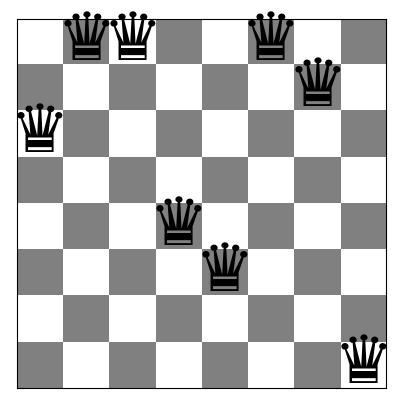

Queens (left to right) are at rows: [2 0 0 4 5 0 1 7]
Number of conflicts: 7


Board with 2 conflicts.


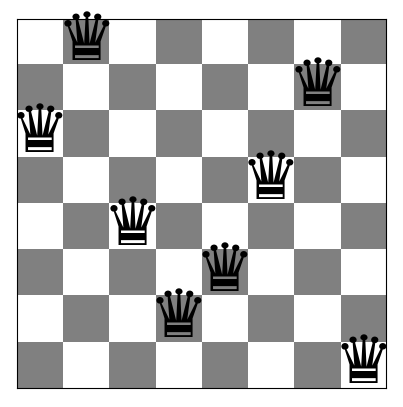

Queens (left to right) are at rows: [2 0 4 6 5 3 1 7]
Number of conflicts: 2


In [51]:
# Code and description go here
def first_choice_hill_climbing(board, max_attempts = 500):
    current_board = board
    best_conflicts = conflicts(current_board)

    attempts = 0  #Keeps track of number of attempts

    while attempts < max_attempts:
        # Generate a random neighbor by moving one queen in a random column to a different row
        col = random.randint(0, len(board) - 1)
        original_row = current_board[col]
        new_row = original_row

        # Check that it does not choose its original row
        while original_row == new_row:
            new_row = np.random.randint(0, len(board))

        # Move the queen to the new row in that column
        new_board = current_board.copy()
        new_board[col] = new_row

        new_conflicts = conflicts(new_board)

        # If the new board has fewer conflicts, update board
        if new_conflicts < best_conflicts:
            current_board = new_board
            best_conflicts = new_conflicts
            attempts = 0  # Reset attempts
        else:
            attempts += 1  # If no better move found, update attempts

        # Optimal solution reached
        if best_conflicts == 0:
            break

    return current_board



board = random_board(8)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = first_choice_hill_climbing(board)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Board with 6 conflicts.


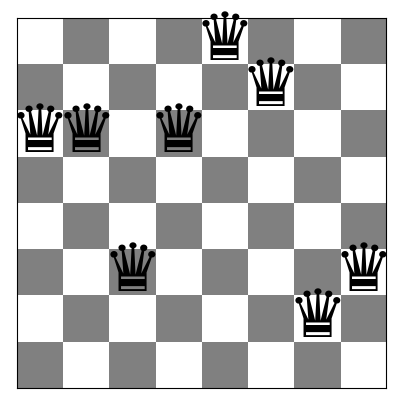

Queens (left to right) are at rows: [2 2 5 2 0 1 6 5]
Number of conflicts: 6


Board with 0 conflicts.


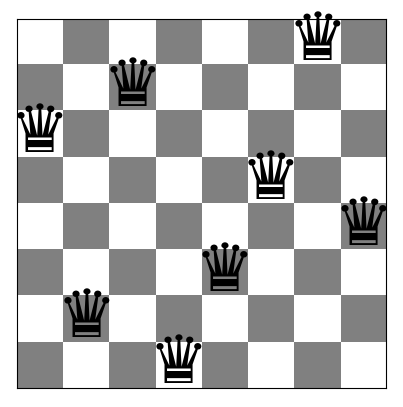

Queens (left to right) are at rows: [2 6 1 7 5 3 0 4]
Number of conflicts: 0


Board with 8 conflicts.


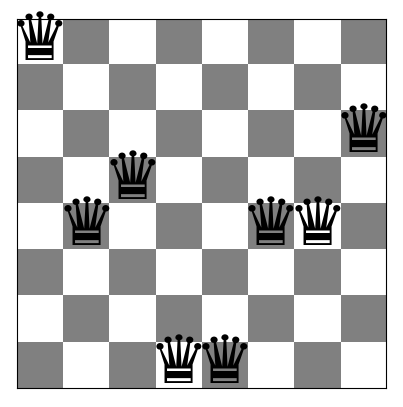

Queens (left to right) are at rows: [0 4 3 7 7 4 4 2]
Number of conflicts: 8


Board with 0 conflicts.


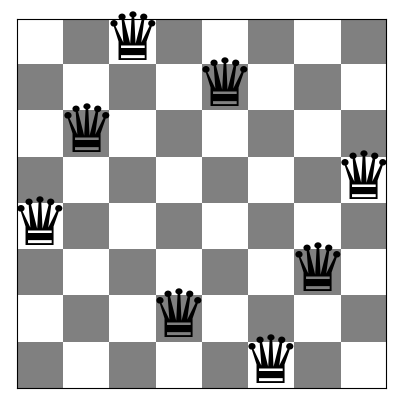

Queens (left to right) are at rows: [4 2 0 6 1 7 5 3]
Number of conflicts: 0


Board with 8 conflicts.


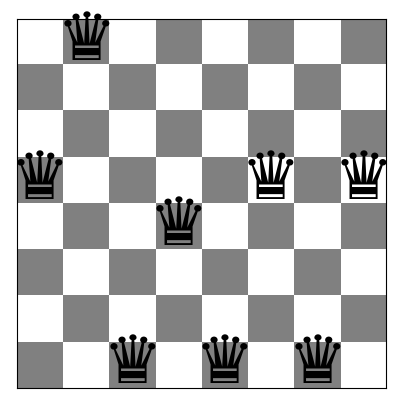

Queens (left to right) are at rows: [3 0 7 4 7 3 7 3]
Number of conflicts: 8


Board with 0 conflicts.


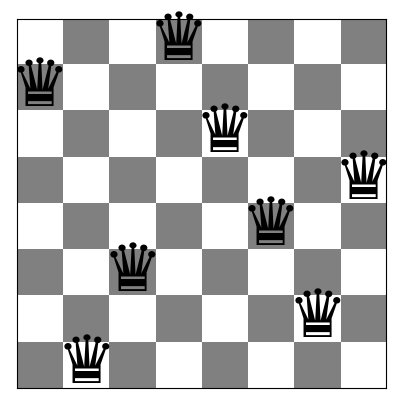

Queens (left to right) are at rows: [1 7 5 0 2 4 6 3]
Number of conflicts: 0


In [ ]:
# Code and description go here
# Steepest Ascend
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
current_board = steepest_ascend(board)
current_conflicts = conflicts(current_board)
for i in range(100):
    board = random_board(8)
    new_board = steepest_ascend(board)
    new_conflicts = conflicts(new_board)
    if new_conflicts < current_conflicts:
        current_board = new_board
        current_conflicts = new_conflicts
    # If it reaches optimal solution early
    if new_conflicts == 0:
        current_board = new_board
        current_conflicts = new_conflicts
        break
show_board(current_board)
print(f"Queens (left to right) are at rows: {current_board}")
print(f"Number of conflicts: {conflicts(current_board)}")

#Stochastic Hill
print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
current_board = stochastic_hill_climb(board)
current_conflicts = conflicts(current_board)
for i in range(100):
    board = random_board(8)
    new_board = stochastic_hill_climb(board)
    new_conflicts = conflicts(new_board)
    if new_conflicts < current_conflicts:
        current_board = new_board
        current_conflicts = new_conflicts
    # If it reaches optimal solution early
    if new_conflicts == 0:
        current_board = new_board
        current_conflicts = new_conflicts
        break
show_board(current_board)
print(f"Queens (left to right) are at rows: {current_board}")
print(f"Number of conflicts: {conflicts(current_board)}")

# First Choice Hill
print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
current_board = first_choice_hill_climbing(board)
current_conflicts = conflicts(current_board)
for i in range(100):
    board = random_board(8)
    new_board = first_choice_hill_climbing(board)
    new_conflicts = conflicts(new_board)
    if new_conflicts < current_conflicts:
        current_board = new_board
        current_conflicts = new_conflicts
    # If it reaches optimal solution early
    if new_conflicts == 0:
        current_board = new_board
        current_conflicts = new_conflicts
        break
show_board(current_board)
print(f"Queens (left to right) are at rows: {current_board}")
print(f"Number of conflicts: {conflicts(current_board)}")

After running each algorithm 100 times with a random board, I was able to get the optimal solution for all three algorithms as shown above in the images.

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

Board with 5 conflicts.


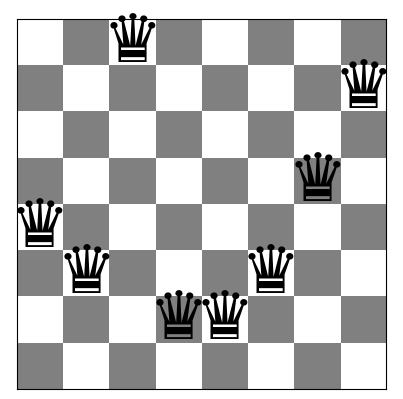

Queens (left to right) are at rows: [4 5 0 6 6 5 3 1]
Number of conflicts: 5


Board with 0 conflicts.


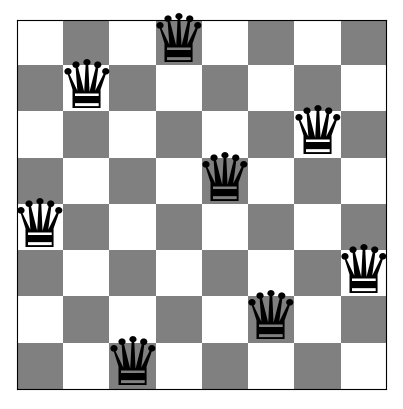

Queens (left to right) are at rows: [4 1 7 0 3 6 2 5]
Number of conflicts: 0


Board with 4 conflicts.


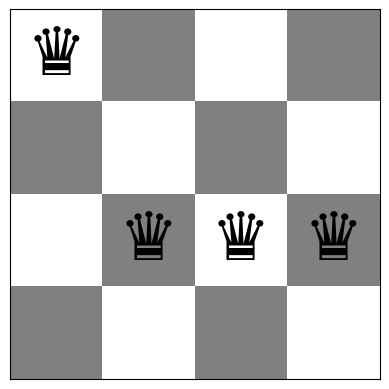

Queens (left to right) are at rows: [0 2 2 2]
Number of conflicts: 4


Board with 0 conflicts.


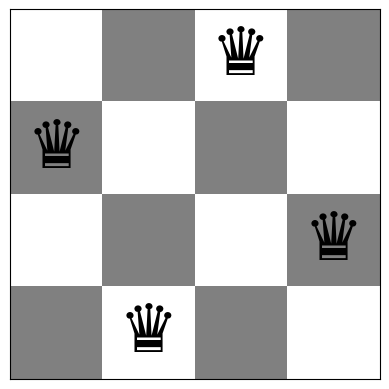

Queens (left to right) are at rows: [1 3 0 2]
Number of conflicts: 0


Board with 5 conflicts.


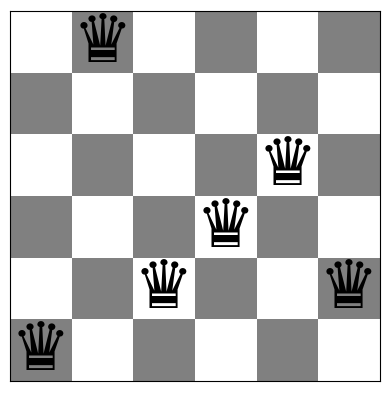

Queens (left to right) are at rows: [5 0 4 3 2 4]
Number of conflicts: 5


Board with 0 conflicts.


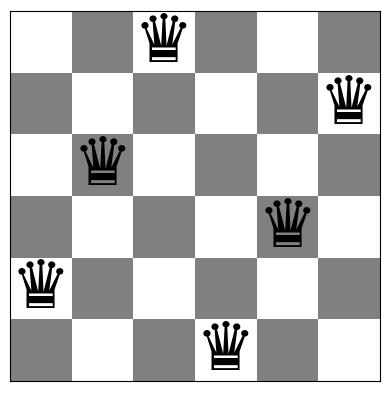

Queens (left to right) are at rows: [4 2 0 5 3 1]
Number of conflicts: 0


Board with 7 conflicts.


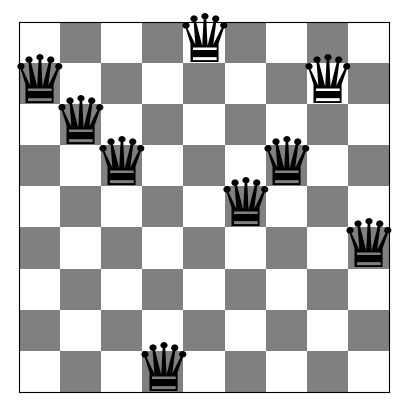

Queens (left to right) are at rows: [1 2 3 8 0 4 3 1 5]
Number of conflicts: 7


Board with 0 conflicts.


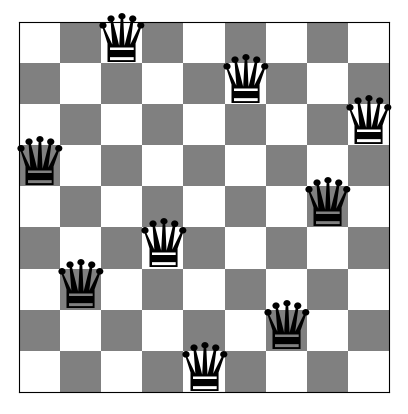

Queens (left to right) are at rows: [3 6 0 5 8 1 7 4 2]
Number of conflicts: 0


In [7]:
# Code and description go here
def simulated_annealing(board, temp):
    current_board = board
    current_conflicts = conflicts(current_board)
    best_board = current_board.copy()
    best_conflicts = current_conflicts

    T = temp
    t = 1
    while T >= 0.0000001 and best_conflicts > 0:

        T = temp / (1 + t)
        #Generate a random neighbor
        col = np.random.randint(0, len(board))
        new_row = np.random.randint(0, len(board))
        # Check that the queen will not stay in the same row
        while new_row == current_board[col]:
            new_row = np.random.randint(0, len(board))

        new_board = current_board.copy()
        new_board[col] = new_row

        new_conflicts = conflicts(new_board)
        delta_e = current_conflicts - new_conflicts

        #Always accept better solutions
        if delta_e > 0 or np.random.uniform(0, 1) < np.exp(delta_e / T):
            current_board = new_board
            current_conflicts = new_conflicts

            if new_conflicts < best_conflicts:
                best_board = current_board.copy()
                best_conflicts = new_conflicts
        t += 1

    return best_board

board = random_board(8)
temp = 4000
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = simulated_annealing(board, temp)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

print("\n")
board = random_board(4)
temp = 4000
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = simulated_annealing(board, temp)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

print("\n")
board = random_board(6)
temp = 4000
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = simulated_annealing(board, temp)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

print("\n")
board = random_board(9)
temp = 4000
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = simulated_annealing(board, temp)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

2. Compared to previous algorithms:
- The simulated annealing algorithm based on runs with 4x4, 6x6, and 8x8 boards seems to find optimal solutions on the first run, which is much better compared to the previous steepest ascend, stochastic hill climbing, and first choice hill climbing. However, one key drawback is that the runtime takes longer for simulated annealing compared to the other three algorithms especially when doing boards of size 9x9 and beyond, so in scenarios where a "good enough" solution is needed, it would be better to use the previous three algorithms instead of simulated annealing.

3. Discuss your choice of annealing schedule
- I chose to use the fast simulated annealing because it is useful for problems that require fine-tuning in the final stages of optimization. It balances exploration time and convergence, and achieves better solutions faster than classic simulated annealing or exponential cooling. While it may struggle with boards that are too large, since for the purposes of this assignment, we are only going to boards of 8x8 size at the largest, I felt that the tradeoff between time and performance is worth using fast simulated annealing. I set the temperature to 4000 because too high of a temperature can lead to a higher chance of getting a non optimal solution, but too low of a temp may cause it to take longer, so I felt that my choice of 4000 for the temp achieves a good balance between the two.

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |      0.00034  |         0.66                      | 41|
| Stochastic HC 1     |     4      |      0.00034  |          0.77                     | 36|
| Stochastic HC 2     |     4      |     0.0022    |            0.78                   | 36|
| Simulated Annealing |     4      |      0.0025     |               0                   |100|
| Steepest asc. HC    |     8      |      0.0033   |              1.26                 | 11|
| Stochastic HC 1     |     8      |    0.0044     |             1.28                  | 14|
| Stochastic HC 2     |     8      |    0.0053     |                1.16               |18 |
| Simulated Annealing |     8      |    0.166       |                 0                 |100|


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

I ran each algorithm on board sizes 10,15, and 20 for 100 times each.

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     10      |      0.010  |         1.44                      | 8|
| Stochastic HC 1     |     10      |      0.014  |          1.62                     | 7|
| Stochastic HC 2     |     10      |     0.010    |            1.58                   | 7|
| Simulated Annealing |     10      |      0.3166     |               0                   |100|
| Steepest asc. HC    |     15      |      0.045  |         1.99                      | 2|
| Stochastic HC 1     |     15      |      0.075  |          2.06                     | 1|
| Stochastic HC 2     |     15      |     0.017    |            2.1                   | 1|
| Simulated Annealing |     15      |      0.613     |               0                   |100|
| Steepest asc. HC    |     20      |      0.143  |         2.38                      | 4|
| Stochastic HC 1     |     20      |      0.226  |          2.49                     | 1|
| Stochastic HC 2     |     20      |     0.024    |            2.92                   | 0|
| Simulated Annealing |     20      |      0.976     |               0                   |100|

In the three charts below, you can see that as board size increases, all 4 algorithms take an increasing amount of time to find the solution, while the average number of conflicts and % of runs ending in optimal solution for all except Simulated Annealing decrease. Simulated annealing performs the best interms of average number of conflicts and % of runs ending in optimal solution as it has an average of 0 conflicts and all runs end in an optimal solution. Stochastic Hill Climbing 2 performs the worst out of all 4 alforithms, with it having the highest average run time, number of conflicts, and lowest % of runs ending in an optimal solution for all board sizes as the board size increases.

* What is the largest board each algorithm can solve in a reasonable amount time?
  - See results below


Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

NOTE: The boards shown below are just to demonstrate the size of the board. Each algorithm will be ran for 100 times



Board with 4 conflicts.


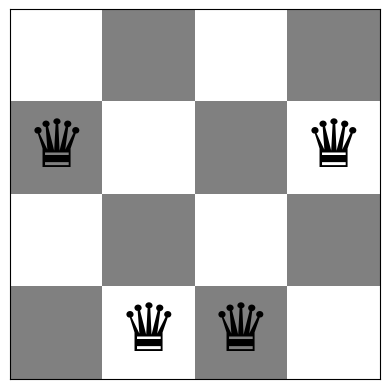

Queens (left to right) are at rows: [1 3 3 1]
Number of conflicts: 4


Steepest Ascend Average Conflicts: 0.66
Steepest Ascend Average Runtime: 0.0003405928611755371
Steepest Ascend Optimal Solution %: 41.0%


Board with 10 conflicts.


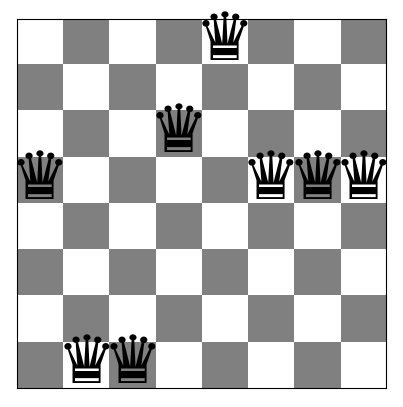

Queens (left to right) are at rows: [3 7 7 2 0 3 3 3]
Number of conflicts: 10


Steepest Ascend Average Conflicts: 1.26
Steepest Ascend Average Runtime: 0.0033405733108520506
Steepest Ascend Optimal Solution %: 11.0%


In [ ]:
# Code, results, charts and discussion go here
import time

steepest_ascend_runtime = 0
steepest_ascend_avg_conflicts = 0
steepest_ascend_optimal = 0

print("\n")
board = random_board(4)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(4)
    start_time = time.time()
    board = steepest_ascend(board)
    new_conflicts = conflicts(board)
    steepest_ascend_runtime += (time.time() - start_time)
    steepest_ascend_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        steepest_ascend_optimal += 1

steepest_ascend_avg_conflicts = steepest_ascend_avg_conflicts/100
steepest_ascend_runtime = steepest_ascend_runtime/100
steepest_ascend_optimal = steepest_ascend_optimal/100
print(f"Steepest Ascend Average Conflicts: {steepest_ascend_avg_conflicts}")
print(f"Steepest Ascend Average Runtime: {steepest_ascend_runtime}")
print(f"Steepest Ascend Optimal Solution %: {steepest_ascend_optimal * 100}%")

steepest_ascend_runtime = 0
steepest_ascend_avg_conflicts = 0
steepest_ascend_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = steepest_ascend(board)
    new_conflicts = conflicts(board)
    steepest_ascend_runtime += (time.time() - start_time)
    steepest_ascend_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        steepest_ascend_optimal += 1

steepest_ascend_avg_conflicts = steepest_ascend_avg_conflicts/100
steepest_ascend_runtime = steepest_ascend_runtime/100
steepest_ascend_optimal = steepest_ascend_optimal/100
print(f"Steepest Ascend Average Conflicts: {steepest_ascend_avg_conflicts}")
print(f"Steepest Ascend Average Runtime: {steepest_ascend_runtime}")
print(f"Steepest Ascend Optimal Solution %: {steepest_ascend_optimal*100}%")



Board with 3 conflicts.


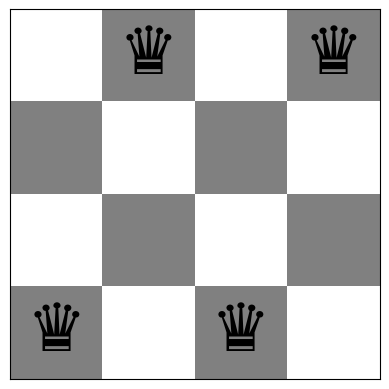

Queens (left to right) are at rows: [3 0 3 0]
Number of conflicts: 3


Stochastic Hill Climb Conflicts: 0.77
Stochastic Hill Climb Average Runtime: 0.00034816980361938475
Stochastic Hill Climb Optimal Solution %: 36.0%


Board with 9 conflicts.


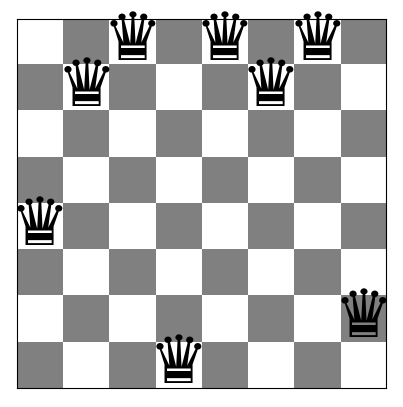

Queens (left to right) are at rows: [4 1 0 7 0 1 0 6]
Number of conflicts: 9


Stochastic Hill Climb Conflicts: 1.28
Stochastic Hill Climb Average Runtime: 0.004457604885101318
Stochastic Hill Climb Optimal Solution %: 14.000000000000002%


In [ ]:
# Code, results, charts and discussion go here
import time

stochasic_hill_1_runtime = 0
stochasic_hill_1_avg_conflicts = 0
stochasic_hill_1_optimal = 0

print("\n")
board = random_board(4)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(4)
    start_time = time.time()
    board = stochastic_hill_climb(board)
    new_conflicts = conflicts(board)
    stochasic_hill_1_runtime += (time.time() - start_time)
    stochasic_hill_1_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_1_optimal += 1

stochasic_hill_1_avg_conflicts = stochasic_hill_1_avg_conflicts/100
stochasic_hill_1_runtime = stochasic_hill_1_runtime/100
stochasic_hill_1_optimal = stochasic_hill_1_optimal/100
print(f"Stochastic Hill Climb Conflicts: {stochasic_hill_1_avg_conflicts}")
print(f"Stochastic Hill Climb Average Runtime: {stochasic_hill_1_runtime}")
print(f"Stochastic Hill Climb Optimal Solution %: {stochasic_hill_1_optimal*100}%")

stochasic_hill_1_runtime = 0
stochasic_hill_1_avg_conflicts = 0
stochasic_hill_1_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = stochastic_hill_climb(board)
    new_conflicts = conflicts(board)
    stochasic_hill_1_runtime += (time.time() - start_time)
    stochasic_hill_1_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_1_optimal += 1

stochasic_hill_1_avg_conflicts = stochasic_hill_1_avg_conflicts/100
stochasic_hill_1_runtime = stochasic_hill_1_runtime/100
stochasic_hill_1_optimal = stochasic_hill_1_optimal/100
print(f"Stochastic Hill Climb Conflicts: {stochasic_hill_1_avg_conflicts}")
print(f"Stochastic Hill Climb Average Runtime: {stochasic_hill_1_runtime}")
print(f"Stochastic Hill Climb Optimal Solution %: {stochasic_hill_1_optimal * 100}%")



Board with 4 conflicts.


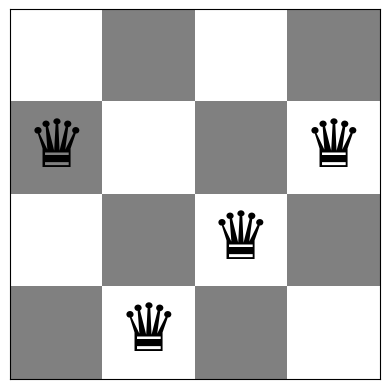

Queens (left to right) are at rows: [1 3 2 1]
Number of conflicts: 4


First Choice Hill Climb Average Conflicts: 0.78
First Choice Hill Climb Average Runtime: 0.0022368431091308594
First Choice Hill Climb Optimal Solution %: 36.0%


Board with 7 conflicts.


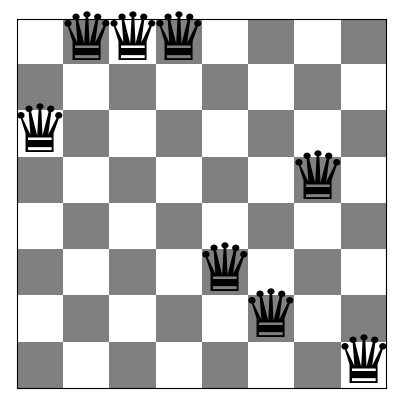

Queens (left to right) are at rows: [2 0 0 0 5 6 3 7]
Number of conflicts: 7


First Choice Hill Climb Average Conflicts: 1.16
First Choice Hill Climb Average Runtime: 0.005301251411437989
First Choice Hill Climb Optimal Solution %: 18.0%


In [ ]:
# Code, results, charts and discussion go here
import time

stochasic_hill_2_runtime = 0
stochasic_hill_2_avg_conflicts = 0
stochasic_hill_2_optimal = 0

print("\n")
board = random_board(4)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(4)
    start_time = time.time()
    board = first_choice_hill_climbing(board)
    new_conflicts = conflicts(board)
    stochasic_hill_2_runtime += (time.time() - start_time)
    stochasic_hill_2_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_2_optimal += 1

stochasic_hill_2_avg_conflicts = stochasic_hill_2_avg_conflicts/100
stochasic_hill_2_runtime = stochasic_hill_2_runtime/100
stochasic_hill_2_optimal = stochasic_hill_2_optimal/100
print(f"First Choice Hill Climb Average Conflicts: {stochasic_hill_2_avg_conflicts}")
print(f"First Choice Hill Climb Average Runtime: {stochasic_hill_2_runtime}")
print(f"First Choice Hill Climb Optimal Solution %: {stochasic_hill_2_optimal * 100}%")

stochasic_hill_2_runtime = 0
stochasic_hill_2_avg_conflicts = 0
stochasic_hill_2_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = first_choice_hill_climbing(board)
    new_conflicts = conflicts(board)
    stochasic_hill_2_runtime += (time.time() - start_time)
    stochasic_hill_2_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_2_optimal += 1

stochasic_hill_2_avg_conflicts = stochasic_hill_2_avg_conflicts/100
stochasic_hill_2_runtime = stochasic_hill_2_runtime/100
stochasic_hill_2_optimal = stochasic_hill_2_optimal/100
print(f"First Choice Hill Climb Average Conflicts: {stochasic_hill_2_avg_conflicts}")
print(f"First Choice Hill Climb Average Runtime: {stochasic_hill_2_runtime}")
print(f"First Choice Hill Climb Optimal Solution %: {stochasic_hill_2_optimal * 100}%")



Board with 5 conflicts.


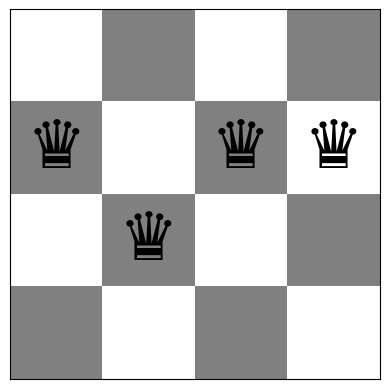

Queens (left to right) are at rows: [1 2 1 1]
Number of conflicts: 5


Simulated Annealing Average Conflicts: 0.0
Simulated Annealing Average Runtime: 0.0025232672691345216
Simulated Annealing Optimal Solution %: 100.0%


Board with 9 conflicts.


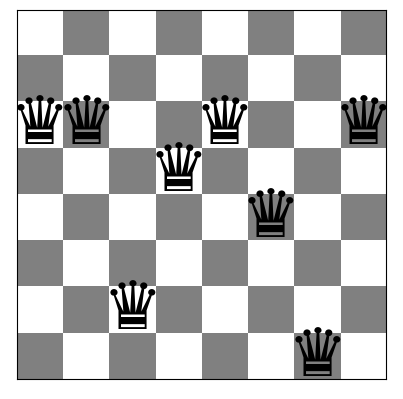

Queens (left to right) are at rows: [2 2 6 3 2 4 7 2]
Number of conflicts: 9


Simulated Annealing Average Conflicts: 0.0
Simulated Annealing Average Runtime: 0.16653730392456054
Simulated Annealing Optimal Solution %: 100.0%


In [10]:
# Code, results, charts and discussion go here
import time
temp = 4000
simulated_annealing_runtime = 0
simulated_annealing_avg_conflicts = 0
simulated_annealing_optimal = 0

print("\n")
board = random_board(4)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(4)
    start_time = time.time()
    board = simulated_annealing(board, temp)
    new_conflicts = conflicts(board)
    simulated_annealing_runtime += (time.time() - start_time)
    simulated_annealing_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        simulated_annealing_optimal += 1

simulated_annealing_avg_conflicts = simulated_annealing_avg_conflicts/100
simulated_annealing_runtime = simulated_annealing_runtime/100
simulated_annealing_optimal = simulated_annealing_optimal/100
print(f"Simulated Annealing Average Conflicts: {simulated_annealing_avg_conflicts}")
print(f"Simulated Annealing Average Runtime: {simulated_annealing_runtime}")
print(f"Simulated Annealing Optimal Solution %: {simulated_annealing_optimal * 100}%")

simulated_annealing_runtime = 0
simulated_annealing_avg_conflicts = 0
simulated_annealing_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = simulated_annealing(board, temp)
    new_conflicts = conflicts(board)
    simulated_annealing_runtime += (time.time() - start_time)
    simulated_annealing_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        simulated_annealing_optimal += 1

simulated_annealing_avg_conflicts = simulated_annealing_avg_conflicts/100
simulated_annealing_runtime = simulated_annealing_runtime/100
simulated_annealing_optimal = simulated_annealing_optimal/100
print(f"Simulated Annealing Average Conflicts: {simulated_annealing_avg_conflicts}")
print(f"Simulated Annealing Average Runtime: {simulated_annealing_runtime}")
print(f"Simulated Annealing Optimal Solution %: {simulated_annealing_optimal * 100}%")



Board with 12 conflicts.


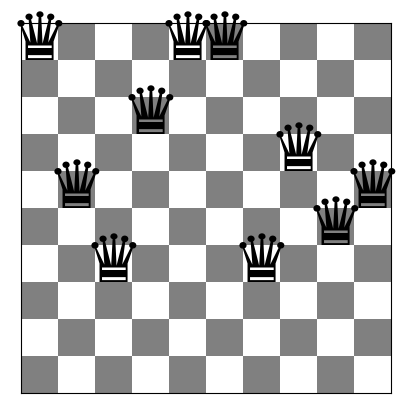

Queens (left to right) are at rows: [0 4 6 2 0 0 6 3 5 4]
Number of conflicts: 12


Steepest Ascend Average Conflicts: 1.44
Steepest Ascend Average Runtime: 0.010258021354675293
Steepest Ascend Optimal Solution %: 8.0%


Board with 11 conflicts.


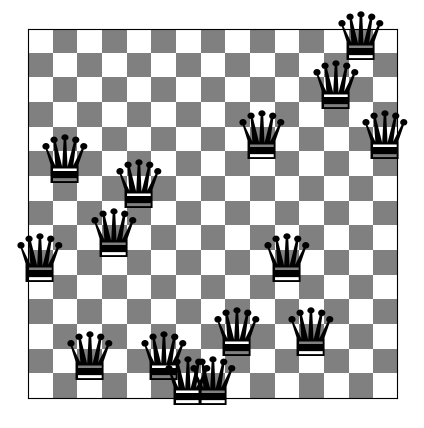

Queens (left to right) are at rows: [ 9  5 13  8  6 13 14 14 12  4  9 12  2  0  4]
Number of conflicts: 11


Steepest Ascend Average Conflicts: 1.99
Steepest Ascend Average Runtime: 0.04585531949996948
Steepest Ascend Optimal Solution %: 2.0%


Board with 20 conflicts.


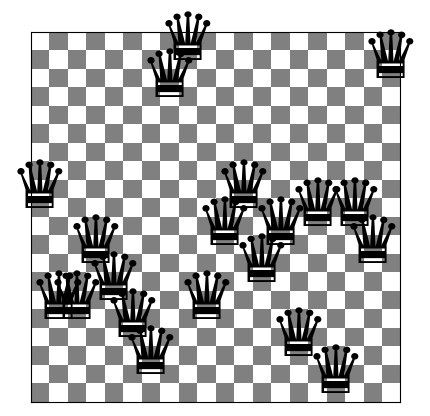

Queens (left to right) are at rows: [ 8 14 14 11 13 15 17  2  0 14 10  8 12 10 16  9 18  9 11  1]
Number of conflicts: 20


Steepest Ascend Average Conflicts: 2.38
Steepest Ascend Average Runtime: 0.14321948528289796
Steepest Ascend Optimal Solution %: 4.0%


In [ ]:
# Code, results, charts and discussion go here
import time

steepest_ascend_runtime = 0
steepest_ascend_avg_conflicts = 0
steepest_ascend_optimal = 0

print("\n")
board = random_board(10)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(10)
    start_time = time.time()
    board = steepest_ascend(board)
    new_conflicts = conflicts(board)
    steepest_ascend_runtime += (time.time() - start_time)
    steepest_ascend_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        steepest_ascend_optimal += 1

steepest_ascend_avg_conflicts = steepest_ascend_avg_conflicts/100
steepest_ascend_runtime = steepest_ascend_runtime/100
steepest_ascend_optimal = steepest_ascend_optimal/100
print(f"Steepest Ascend Average Conflicts: {steepest_ascend_avg_conflicts}")
print(f"Steepest Ascend Average Runtime: {steepest_ascend_runtime}")
print(f"Steepest Ascend Optimal Solution %: {steepest_ascend_optimal * 100}%")

steepest_ascend_runtime = 0
steepest_ascend_avg_conflicts = 0
steepest_ascend_optimal = 0

print("\n")
board = random_board(15)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(15)
    start_time = time.time()
    board = steepest_ascend(board)
    new_conflicts = conflicts(board)
    steepest_ascend_runtime += (time.time() - start_time)
    steepest_ascend_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        steepest_ascend_optimal += 1

steepest_ascend_avg_conflicts = steepest_ascend_avg_conflicts/100
steepest_ascend_runtime = steepest_ascend_runtime/100
steepest_ascend_optimal = steepest_ascend_optimal/100
print(f"Steepest Ascend Average Conflicts: {steepest_ascend_avg_conflicts}")
print(f"Steepest Ascend Average Runtime: {steepest_ascend_runtime}")
print(f"Steepest Ascend Optimal Solution %: {steepest_ascend_optimal*100}%")

steepest_ascend_runtime = 0
steepest_ascend_avg_conflicts = 0
steepest_ascend_optimal = 0

print("\n")
board = random_board(20)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(20)
    start_time = time.time()
    board = steepest_ascend(board)
    new_conflicts = conflicts(board)
    steepest_ascend_runtime += (time.time() - start_time)
    steepest_ascend_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        steepest_ascend_optimal += 1

steepest_ascend_avg_conflicts = steepest_ascend_avg_conflicts/100
steepest_ascend_runtime = steepest_ascend_runtime/100
steepest_ascend_optimal = steepest_ascend_optimal/100
print(f"Steepest Ascend Average Conflicts: {steepest_ascend_avg_conflicts}")
print(f"Steepest Ascend Average Runtime: {steepest_ascend_runtime}")
print(f"Steepest Ascend Optimal Solution %: {steepest_ascend_optimal*100}%")



Board with 12 conflicts.


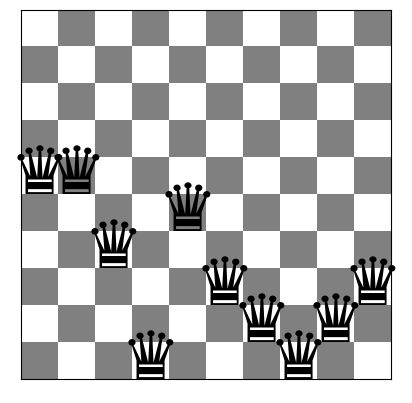

Queens (left to right) are at rows: [4 4 6 9 5 7 8 9 8 7]
Number of conflicts: 12


Stochastic Hill Climb Conflicts: 1.62
Stochastic Hill Climb Average Runtime: 0.014670681953430176
Stochastic Hill Climb Optimal Solution %: 7.000000000000001%


Board with 15 conflicts.


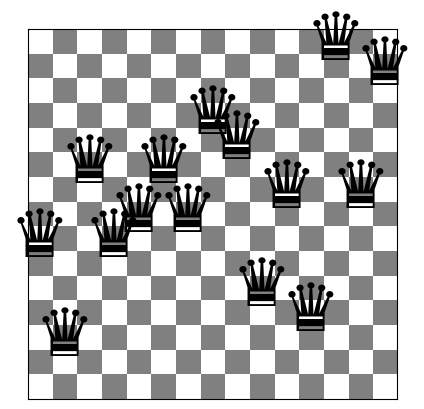

Queens (left to right) are at rows: [ 8 12  5  8  7  5  7  3  4 10  6 11  0  6  1]
Number of conflicts: 15


Stochastic Hill Climb Conflicts: 2.06
Stochastic Hill Climb Average Runtime: 0.07570815086364746
Stochastic Hill Climb Optimal Solution %: 1.0%


Board with 23 conflicts.


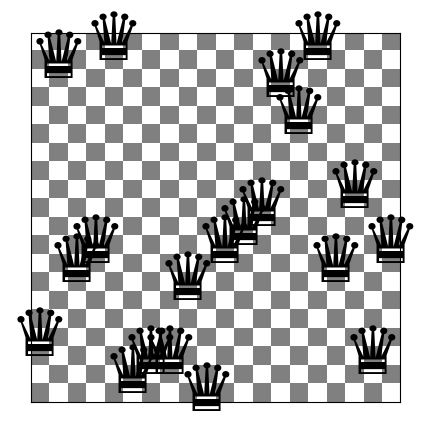

Queens (left to right) are at rows: [16  1 12 11  0 18 17 17 13 19 11 10  9  2  4  0 12  8 17 11]
Number of conflicts: 23


Stochastic Hill Climb Conflicts: 2.49
Stochastic Hill Climb Average Runtime: 0.2265069627761841
Stochastic Hill Climb Optimal Solution %: 1.0%


In [ ]:
# Code, results, charts and discussion go here
import time

stochasic_hill_1_runtime = 0
stochasic_hill_1_avg_conflicts = 0
stochasic_hill_1_optimal = 0

print("\n")
board = random_board(10)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(10)
    start_time = time.time()
    board = stochastic_hill_climb(board)
    new_conflicts = conflicts(board)
    stochasic_hill_1_runtime += (time.time() - start_time)
    stochasic_hill_1_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_1_optimal += 1

stochasic_hill_1_avg_conflicts = stochasic_hill_1_avg_conflicts/100
stochasic_hill_1_runtime = stochasic_hill_1_runtime/100
stochasic_hill_1_optimal = stochasic_hill_1_optimal/100
print(f"Stochastic Hill Climb Conflicts: {stochasic_hill_1_avg_conflicts}")
print(f"Stochastic Hill Climb Average Runtime: {stochasic_hill_1_runtime}")
print(f"Stochastic Hill Climb Optimal Solution %: {stochasic_hill_1_optimal*100}%")

stochasic_hill_1_runtime = 0
stochasic_hill_1_avg_conflicts = 0
stochasic_hill_1_optimal = 0

print("\n")
board = random_board(15)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(15)
    start_time = time.time()
    board = stochastic_hill_climb(board)
    new_conflicts = conflicts(board)
    stochasic_hill_1_runtime += (time.time() - start_time)
    stochasic_hill_1_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_1_optimal += 1

stochasic_hill_1_avg_conflicts = stochasic_hill_1_avg_conflicts/100
stochasic_hill_1_runtime = stochasic_hill_1_runtime/100
stochasic_hill_1_optimal = stochasic_hill_1_optimal/100
print(f"Stochastic Hill Climb Conflicts: {stochasic_hill_1_avg_conflicts}")
print(f"Stochastic Hill Climb Average Runtime: {stochasic_hill_1_runtime}")
print(f"Stochastic Hill Climb Optimal Solution %: {stochasic_hill_1_optimal * 100}%")

stochasic_hill_1_runtime = 0
stochasic_hill_1_avg_conflicts = 0
stochasic_hill_1_optimal = 0

print("\n")
board = random_board(20)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(20)
    start_time = time.time()
    board = stochastic_hill_climb(board)
    new_conflicts = conflicts(board)
    stochasic_hill_1_runtime += (time.time() - start_time)
    stochasic_hill_1_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_1_optimal += 1

stochasic_hill_1_avg_conflicts = stochasic_hill_1_avg_conflicts/100
stochasic_hill_1_runtime = stochasic_hill_1_runtime/100
stochasic_hill_1_optimal = stochasic_hill_1_optimal/100
print(f"Stochastic Hill Climb Conflicts: {stochasic_hill_1_avg_conflicts}")
print(f"Stochastic Hill Climb Average Runtime: {stochasic_hill_1_runtime}")
print(f"Stochastic Hill Climb Optimal Solution %: {stochasic_hill_1_optimal * 100}%")



Board with 8 conflicts.


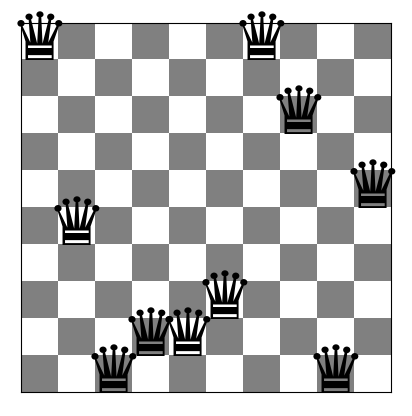

Queens (left to right) are at rows: [0 5 9 8 8 7 0 2 9 4]
Number of conflicts: 8


First Choice Hill Climb Average Conflicts: 1.58
First Choice Hill Climb Average Runtime: 0.010184762477874755
First Choice Hill Climb Optimal Solution %: 7.000000000000001%


Board with 14 conflicts.


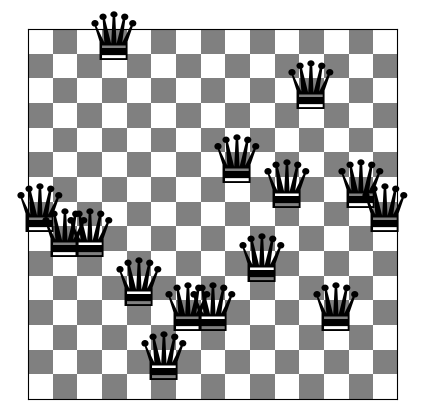

Queens (left to right) are at rows: [ 7  8  8  0 10 13 11 11  5  9  6  2 11  6  7]
Number of conflicts: 14


First Choice Hill Climb Average Conflicts: 2.1
First Choice Hill Climb Average Runtime: 0.017354795932769774
First Choice Hill Climb Optimal Solution %: 1.0%


Board with 18 conflicts.


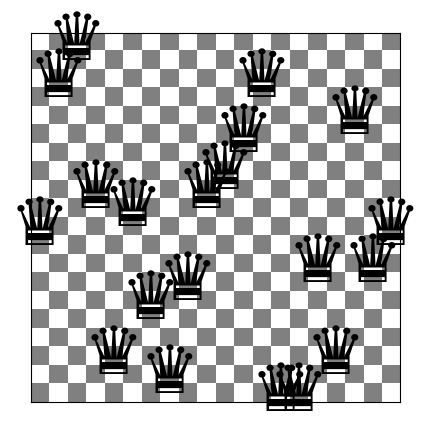

Queens (left to right) are at rows: [10  2  0  8 17  9 14 18 13  8  7  5  2 19 19 12 17  4 12 10]
Number of conflicts: 18


First Choice Hill Climb Average Conflicts: 2.92
First Choice Hill Climb Average Runtime: 0.02423083782196045
First Choice Hill Climb Optimal Solution %: 0.0%


In [ ]:
# Code, results, charts and discussion go here
import time

stochasic_hill_2_runtime = 0
stochasic_hill_2_avg_conflicts = 0
stochasic_hill_2_optimal = 0

print("\n")
board = random_board(10)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(10)
    start_time = time.time()
    board = first_choice_hill_climbing(board)
    new_conflicts = conflicts(board)
    stochasic_hill_2_runtime += (time.time() - start_time)
    stochasic_hill_2_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_2_optimal += 1

stochasic_hill_2_avg_conflicts = stochasic_hill_2_avg_conflicts/100
stochasic_hill_2_runtime = stochasic_hill_2_runtime/100
stochasic_hill_2_optimal = stochasic_hill_2_optimal/100
print(f"First Choice Hill Climb Average Conflicts: {stochasic_hill_2_avg_conflicts}")
print(f"First Choice Hill Climb Average Runtime: {stochasic_hill_2_runtime}")
print(f"First Choice Hill Climb Optimal Solution %: {stochasic_hill_2_optimal * 100}%")

stochasic_hill_2_runtime = 0
stochasic_hill_2_avg_conflicts = 0
stochasic_hill_2_optimal = 0

print("\n")
board = random_board(15)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(15)
    start_time = time.time()
    board = first_choice_hill_climbing(board)
    new_conflicts = conflicts(board)
    stochasic_hill_2_runtime += (time.time() - start_time)
    stochasic_hill_2_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_2_optimal += 1

stochasic_hill_2_avg_conflicts = stochasic_hill_2_avg_conflicts/100
stochasic_hill_2_runtime = stochasic_hill_2_runtime/100
stochasic_hill_2_optimal = stochasic_hill_2_optimal/100
print(f"First Choice Hill Climb Average Conflicts: {stochasic_hill_2_avg_conflicts}")
print(f"First Choice Hill Climb Average Runtime: {stochasic_hill_2_runtime}")
print(f"First Choice Hill Climb Optimal Solution %: {stochasic_hill_2_optimal * 100}%")

stochasic_hill_2_runtime = 0
stochasic_hill_2_avg_conflicts = 0
stochasic_hill_2_optimal = 0

print("\n")
board = random_board(20)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(20)
    start_time = time.time()
    board = first_choice_hill_climbing(board)
    new_conflicts = conflicts(board)
    stochasic_hill_2_runtime += (time.time() - start_time)
    stochasic_hill_2_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_2_optimal += 1

stochasic_hill_2_avg_conflicts = stochasic_hill_2_avg_conflicts/100
stochasic_hill_2_runtime = stochasic_hill_2_runtime/100
stochasic_hill_2_optimal = stochasic_hill_2_optimal/100
print(f"First Choice Hill Climb Average Conflicts: {stochasic_hill_2_avg_conflicts}")
print(f"First Choice Hill Climb Average Runtime: {stochasic_hill_2_runtime}")
print(f"First Choice Hill Climb Optimal Solution %: {stochasic_hill_2_optimal * 100}%")



Board with 15 conflicts.


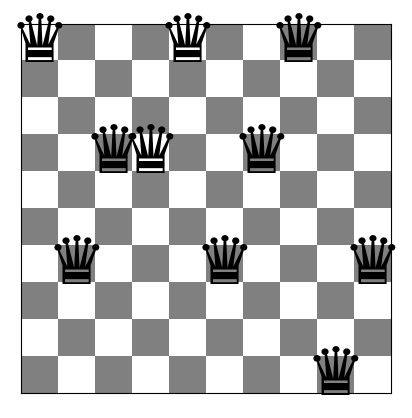

Queens (left to right) are at rows: [0 6 3 3 0 6 3 0 9 6]
Number of conflicts: 15


Simulated Annealing Average Conflicts: 0.0
Simulated Annealing Average Runtime: 0.31662662506103517
Simulated Annealing Optimal Solution %: 100.0%


Board with 17 conflicts.


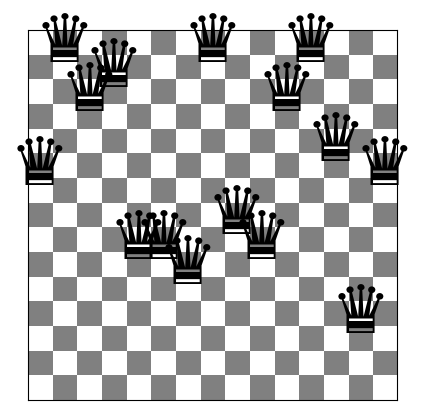

Queens (left to right) are at rows: [ 5  0  2  1  8  8  9  0  7  8  2  0  4 11  5]
Number of conflicts: 17


Simulated Annealing Average Conflicts: 0.0
Simulated Annealing Average Runtime: 0.6138347506523132
Simulated Annealing Optimal Solution %: 100.0%


Board with 20 conflicts.


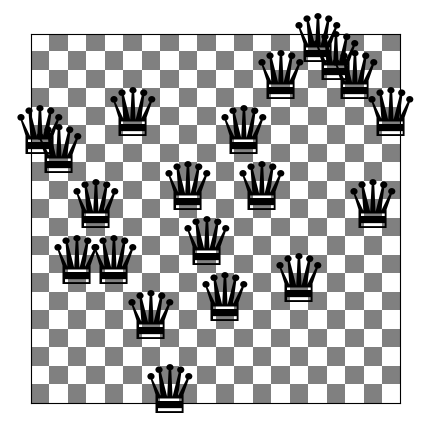

Queens (left to right) are at rows: [ 5  6 12  9 12  4 15 19  8 11 14  5  8  2 13  0  1  2  9  4]
Number of conflicts: 20


Simulated Annealing Average Conflicts: 0.0
Simulated Annealing Average Runtime: 0.9761879181861878
Simulated Annealing Optimal Solution %: 100.0%


In [9]:
# Code, results, charts and discussion go here
import time
temp = 4000
simulated_annealing_runtime = 0
simulated_annealing_avg_conflicts = 0
simulated_annealing_optimal = 0

print("\n")
board = random_board(10)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(10)
    start_time = time.time()
    board = simulated_annealing(board, temp)
    new_conflicts = conflicts(board)
    simulated_annealing_runtime += (time.time() - start_time)
    simulated_annealing_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        simulated_annealing_optimal += 1

simulated_annealing_avg_conflicts = simulated_annealing_avg_conflicts/100
simulated_annealing_runtime = simulated_annealing_runtime/100
simulated_annealing_optimal = simulated_annealing_optimal/100
print(f"Simulated Annealing Average Conflicts: {simulated_annealing_avg_conflicts}")
print(f"Simulated Annealing Average Runtime: {simulated_annealing_runtime}")
print(f"Simulated Annealing Optimal Solution %: {simulated_annealing_optimal * 100}%")

simulated_annealing_runtime = 0
simulated_annealing_avg_conflicts = 0
simulated_annealing_optimal = 0

print("\n")
board = random_board(15)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(15)
    start_time = time.time()
    board = simulated_annealing(board, temp)
    new_conflicts = conflicts(board)
    simulated_annealing_runtime += (time.time() - start_time)
    simulated_annealing_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        simulated_annealing_optimal += 1

simulated_annealing_avg_conflicts = simulated_annealing_avg_conflicts/100
simulated_annealing_runtime = simulated_annealing_runtime/100
simulated_annealing_optimal = simulated_annealing_optimal/100
print(f"Simulated Annealing Average Conflicts: {simulated_annealing_avg_conflicts}")
print(f"Simulated Annealing Average Runtime: {simulated_annealing_runtime}")
print(f"Simulated Annealing Optimal Solution %: {simulated_annealing_optimal * 100}%")

simulated_annealing_runtime = 0
simulated_annealing_avg_conflicts = 0
simulated_annealing_optimal = 0

print("\n")
board = random_board(20)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(20)
    start_time = time.time()
    board = simulated_annealing(board, temp)
    new_conflicts = conflicts(board)
    simulated_annealing_runtime += (time.time() - start_time)
    simulated_annealing_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        simulated_annealing_optimal += 1

simulated_annealing_avg_conflicts = simulated_annealing_avg_conflicts/100
simulated_annealing_runtime = simulated_annealing_runtime/100
simulated_annealing_optimal = simulated_annealing_optimal/100
print(f"Simulated Annealing Average Conflicts: {simulated_annealing_avg_conflicts}")
print(f"Simulated Annealing Average Runtime: {simulated_annealing_runtime}")
print(f"Simulated Annealing Optimal Solution %: {simulated_annealing_optimal * 100}%")

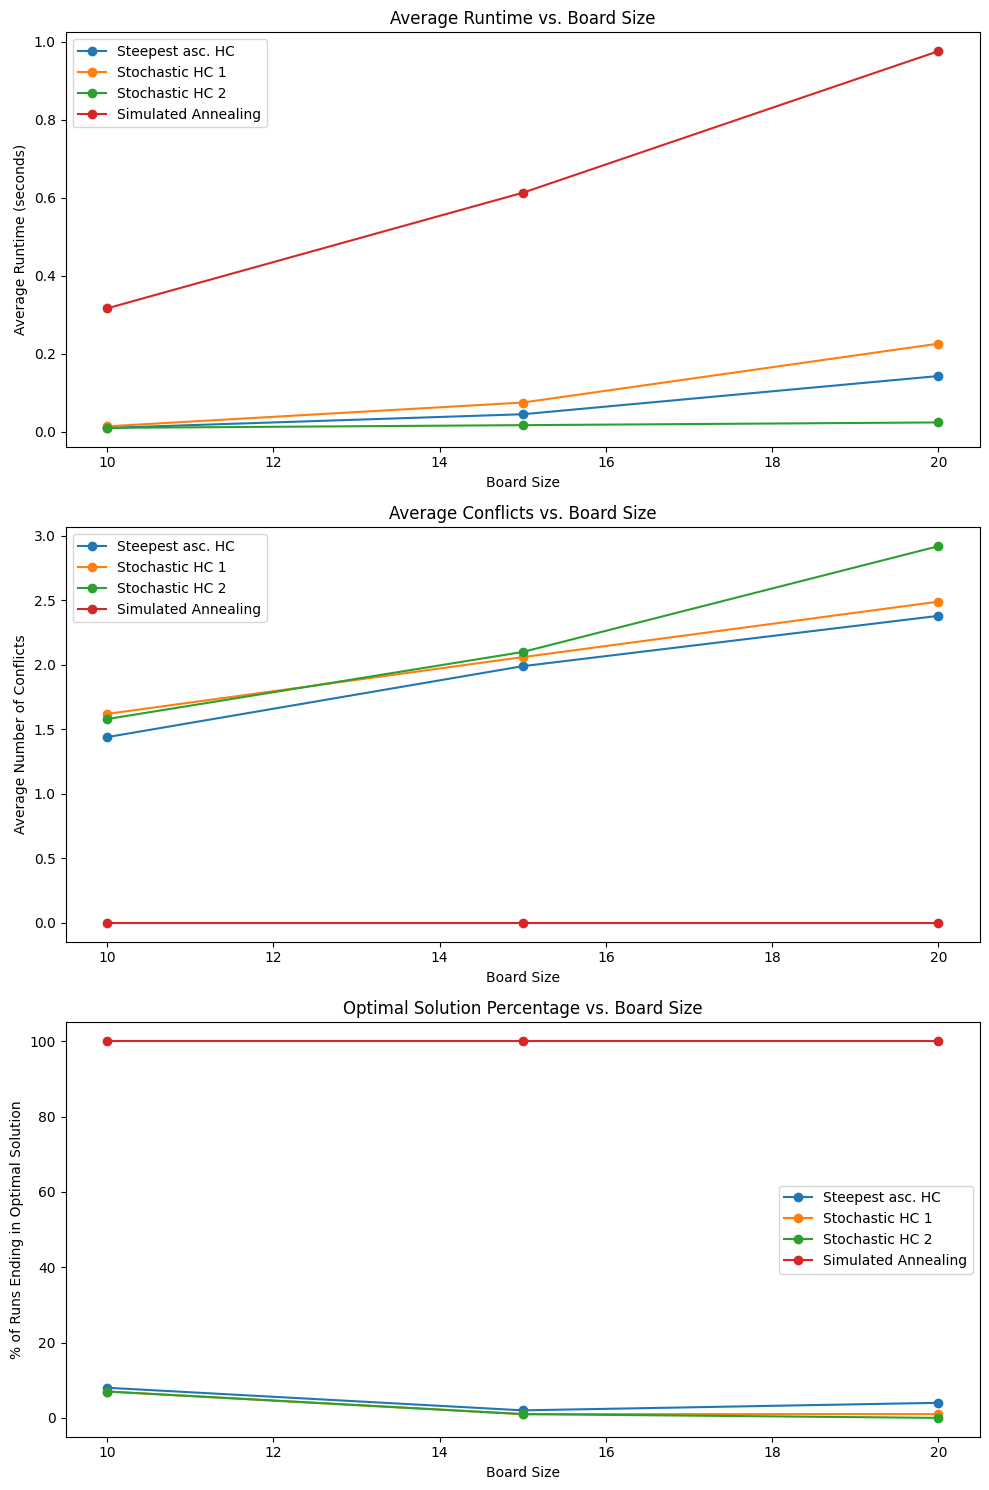

In [14]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['Steepest asc. HC', 'Stochastic HC 1', 'Stochastic HC 2', 'Simulated Annealing']
board_sizes = [10, 15, 20]
avg_runtimes = [[0.010, 0.045, 0.143], [0.014, 0.075, 0.226], [0.010, 0.017, 0.024], [0.3166, 0.613, 0.976]]
avg_conflicts = [[1.44, 1.99, 2.38], [1.62, 2.06, 2.49], [1.58, 2.1, 2.92], [0, 0, 0]]
optimal_percentages = [[8, 2, 4], [7, 1, 1], [7, 1, 0], [100, 100, 100]]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3 subplots for runtime, conflicts, and optimal %

# Plot Average Runtimes
axs[0].plot(board_sizes, avg_runtimes[0], label=algorithms[0], marker='o')
axs[0].plot(board_sizes, avg_runtimes[1], label=algorithms[1], marker='o')
axs[0].plot(board_sizes, avg_runtimes[2], label=algorithms[2], marker='o')
axs[0].plot(board_sizes, avg_runtimes[3], label=algorithms[3], marker='o')
axs[0].set_xlabel('Board Size')
axs[0].set_ylabel('Average Runtime (seconds)')
axs[0].set_title('Average Runtime vs. Board Size')
axs[0].legend()

# Plot Average Conflicts
axs[1].plot(board_sizes, avg_conflicts[0], label=algorithms[0], marker='o')
axs[1].plot(board_sizes, avg_conflicts[1], label=algorithms[1], marker='o')
axs[1].plot(board_sizes, avg_conflicts[2], label=algorithms[2], marker='o')
axs[1].plot(board_sizes, avg_conflicts[3], label=algorithms[3], marker='o')
axs[1].set_xlabel('Board Size')
axs[1].set_ylabel('Average Number of Conflicts')
axs[1].set_title('Average Conflicts vs. Board Size')
axs[1].legend()

# Plot Optimal Solution Percentages
axs[2].plot(board_sizes, optimal_percentages[0], label=algorithms[0], marker='o')
axs[2].plot(board_sizes, optimal_percentages[1], label=algorithms[1], marker='o')
axs[2].plot(board_sizes, optimal_percentages[2], label=algorithms[2], marker='o')
axs[2].plot(board_sizes, optimal_percentages[3], label=algorithms[3], marker='o')
axs[2].set_xlabel('Board Size')
axs[2].set_ylabel('% of Runs Ending in Optimal Solution')
axs[2].set_title('Optimal Solution Percentage vs. Board Size')
axs[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Board with 151 conflicts.


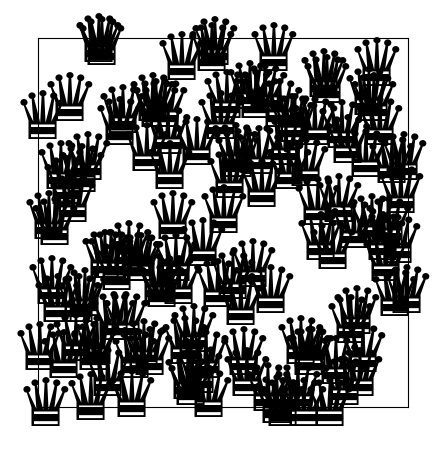

Queens (left to right) are at rows: [105  27 124  61  83  63  89  44 108  49  21  55 102  89  45  87  41 122
 105 103   1   2  74 114  74  95  78  29  25  95  71 121 108  75  75 104
  38 107  21  23  82  84  23  32  44  61  75  83   7 103 115 117  99  36
 113  70 108 121   4   2  84  27  59  20  47  81  38  40  90 107 114  17
  77  20  39  50  18 119  86   4 123  23 124  36  44  28  28 119 103 124
  43 107 107  29  56  68  13  15 124  71 110  55  30 117  35  96  64  93
 114 106  40  19  62  21   9  29  68  75  63  42  87  69  52  41  86]
Number of conflicts - Steepest Ascend: 151


Board with 4 conflicts.


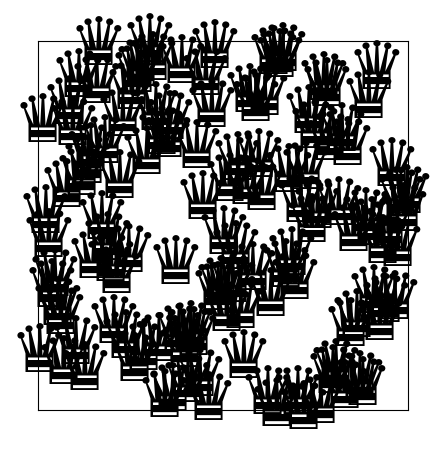

Queens (left to right) are at rows: [105  27  58  66  83  79  89  92 109  49  21  28 102  12  45 111  41  37
  73  14   1  60  34  67  74  95  78  46  25 100  71  16 108  10   8 104
  38   0   6  23 101  31 120  32  26 118  75  98   7 103 115  97  99  36
 113  53  11 121  22   2  84  82  65  91  47  81  70  40  90 107  48  17
  77  20  39  50  18 119  86   4 123   5   3  76  44  72  80 119  54 124
  43  24  61  29  56 122  13  15  33 112 110  55  30 117  35  96  64  93
 114 116  59  19  62  85   9  94  68  88  63  42  87  69  52  57  51]
Number of conflicts - Steepest Ascend: 4
Steepest Ascend Runtime: 284.1200532913208


In [24]:
# Code, results, charts and discussion go here
import time

steepest_ascend_runtime = 0

print("\n")
board = random_board(125)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts - Steepest Ascend: {conflicts(board)}")
print("\n")
start_time = time.time()
board = steepest_ascend(board)
new_conflicts = conflicts(board)
steepest_ascend_runtime += (time.time() - start_time)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts - Steepest Ascend: {conflicts(board)}")
print(f"Steepest Ascend Runtime: {steepest_ascend_runtime}")



Board with 119 conflicts.


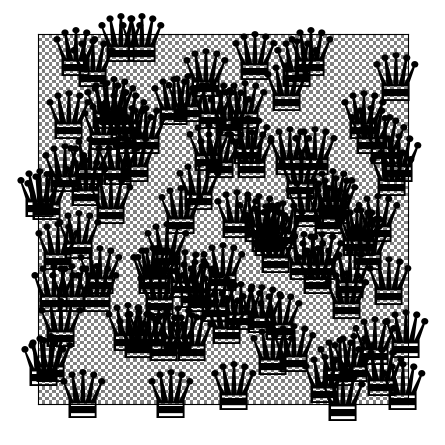

Queens (left to right) are at rows: [ 46  94  47  93  73  61  83  39  24  73   6  58 103  43  37   9  73  68
  27  21  48  20  37   2  24  84  28  36  86   2  28  84  68  68  74  87
  61 103  20  85  51  69  19  87  72  44  73  12  33  21  76  35  67  82
  23 101  52  78  21  31  35   7  53  79  56  57  91  62  81  55  16  34
  90   9  41  64  49   6  34  68  64  99  51  46  48  94 104  75  69  93
  57  57  24  61  28  88  53  97  31  71  40  13  36 101  86]
Number of conflicts - Stochastic Hill Climb: 119


Board with 6 conflicts.


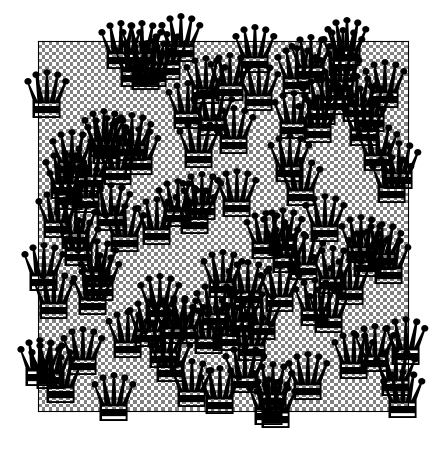

Queens (left to right) are at rows: [ 92  65  16  93  73  50  97  39  42  33  53  58  89  43  37  72  64  68
  27  29  48 102  35   2  54  84  28   7  32   2   8  81   7  52  74  87
   5  91  80  47   0  80  19  98  49  30  45  12  83  21  76 100  67  82
  11  26  44  78  94  70  85   3  14  79  56 103  99 104  71  55  60  34
  22   9  41  62  96   6  75  23  18  51  77  66  15  10   4   1  69  90
  17  57  24  61  20  88  31  59  13  63  40  95  36 101  86]
Number of conflicts - Stochastic Hill Climb: 6
Stochastic Hill Climb Runtime: 290.99152731895447


In [26]:
stochasic_hill_1_runtime = 0

print("\n")
board = random_board(105)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts - Stochastic Hill Climb: {conflicts(board)}")
print("\n")
start_time = time.time()
board = stochastic_hill_climb(board)
new_conflicts = conflicts(board)
stochasic_hill_1_runtime += (time.time() - start_time)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts - Stochastic Hill Climb: {conflicts(board)}")
print(f"Stochastic Hill Climb Runtime: {stochasic_hill_1_runtime}")



Board with 4870 conflicts.


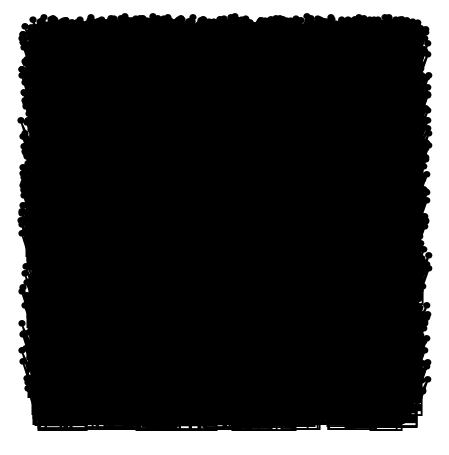

Number of conflicts - First Choice Hill Climb: 4870


Board with 914 conflicts.


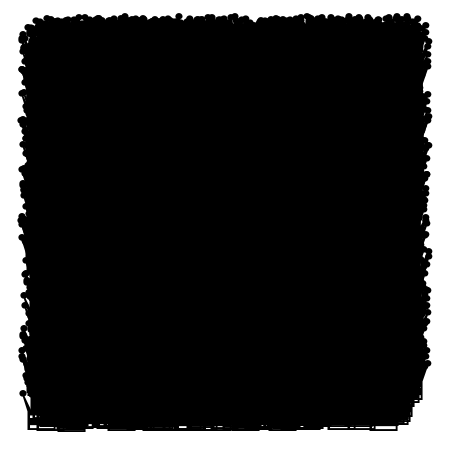

Number of conflicts - First Choice Hill Climb: 914
First Choice Hill Climb Runtime: 280.99960494041443


In [38]:
stochasic_hill_2_runtime = 0

print("\n")
board = random_board(4150)
show_board(board)
print(f"Number of conflicts - First Choice Hill Climb: {conflicts(board)}")
print("\n")
start_time = time.time()
board = first_choice_hill_climbing(board)
new_conflicts = conflicts(board)
stochasic_hill_2_runtime += (time.time() - start_time)
show_board(board)
print(f"Number of conflicts - First Choice Hill Climb: {conflicts(board)}")
print(f"First Choice Hill Climb Runtime: {stochasic_hill_2_runtime}")



Board with 333 conflicts.


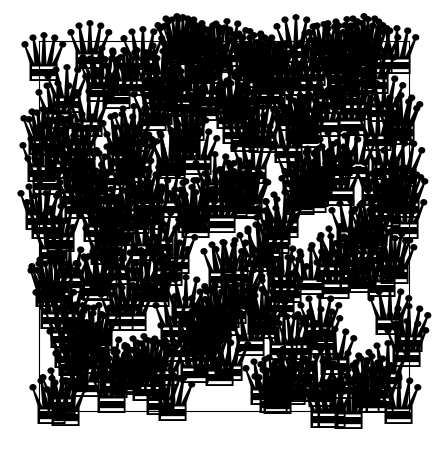

Number of conflicts - Simulated Annealing: 333


Board with 0 conflicts.


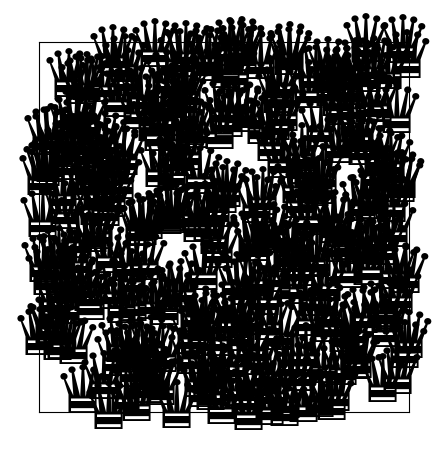

Number of conflicts - Simulated Annealing: 0
Simulated Annealing Runtime: 270.8652935028076


In [52]:
temp = 4000
simulated_annealing_runtime = 0

print("\n")
board = random_board(275)
show_board(board)
print(f"Number of conflicts - Simulated Annealing: {conflicts(board)}")
print("\n")
start_time = time.time()
board = simulated_annealing(board, temp)
new_conflicts = conflicts(board)
simulated_annealing_runtime += (time.time() - start_time)
show_board(board)
print(f"Number of conflicts - Simulated Annealing: {conflicts(board)}")
print(f"Simulated Annealing Runtime: {simulated_annealing_runtime}")

* What is the largest board each algorithm can solve in a reasonable amount time?

For all 4 algorithms, I decided on around 5 minutes as the reasonable amount of time.
- For Steepest Ascend, by running the steepest ascend algorithm multiple times, I found that a board of 125 X 125 gets me roughly 284 seconds, which is 4 minutes and 44 seconds, which is close to the reasonable amount of time.
- For Stochastic Hill Climbing, I found that a board of 105 X 105 gets me a time of 290 seconds, which is roughly 4 minutes and 50 seconds.
- For First Choice Hill Climbing, a board size of 4150 X 4150 gets a time of 280 seconds, which is 4 minutes and 40 seconds. What I found interesting was that First Choice Hill Climbing was able to find solutions much faster compared to the other algorithms, although it does not find the optimal solutions.
- For Simulated Annealing, I found that a board size of 275 X 275 gets me a time of 270 seconds, which is around 4 minutes and 30 seconds. However, it could be possible to get a larger possible board size if I were to use a different cooling schedule or initial temperature. I believe that in cases where the board is smaller than 275 X 275, Simulated Annealing would be the best algorithm to use over the other three, but anything over that would require First Choice Hill Climbing instead in order to reach a reasonable time.

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

Board with 8 conflicts.


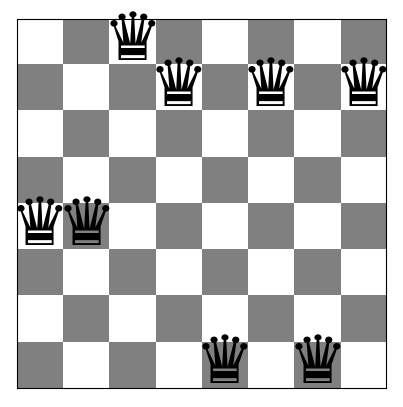

Queens (left to right) are at rows: [4 4 0 1 7 1 7 1]
Number of conflicts: 8


Board with 2 conflicts.


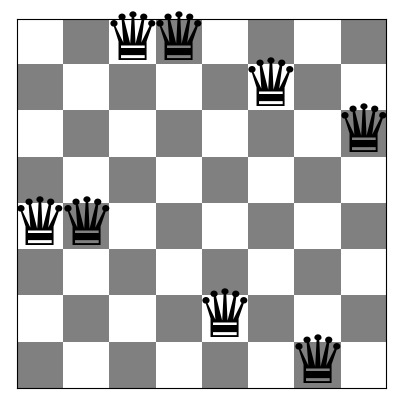

Queens (left to right) are at rows: [4 4 0 0 6 1 7 2]
Number of conflicts: 2


In [16]:
# Code and description go here
def move_queen_once(board):
    current_board = board
    conflict = conflicts(current_board)
    no_conflicts = False

    while not no_conflicts:
        # Optimal solution = no conflicts or board has no conflicts
        if conflicts(current_board) == 0:
            return current_board

        move = current_board.copy()
        found_better_move = False
        for column in range(len(board)):
            # Try moving the queen in this column up or down by one row
            for delta in [-1, 1]:  # Move up by one or down by one
                new_row = current_board[column] + delta
                if 0 <= new_row < len(board):  # Check if new row is within bounds
                    new_board = current_board.copy()
                    new_board[column] = new_row
                    if conflicts(new_board) < conflicts(move):
                        move = new_board
                        found_better_move = True

        # If there is no better move, we stop
        if not found_better_move or conflicts(move) >= conflict:
            no_conflicts = True

        current_board = move
        conflict = conflicts(current_board)

    return current_board

board = random_board(8)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = move_queen_once(board)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

Board with 10 conflicts.


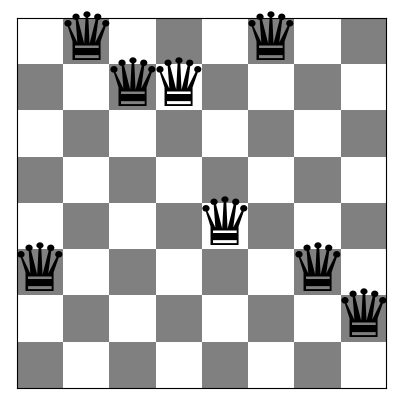

Queens (left to right) are at rows: [5 0 1 1 4 0 5 6]
Number of conflicts: 10


Board with 4 conflicts.


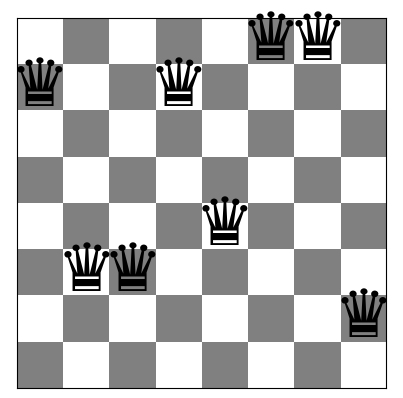

Queens (left to right) are at rows: [1 5 5 1 4 0 0 6]
Number of conflicts: 4


In [63]:
def swap_two_columns(board):
    current_board = board
    conflict = conflicts(current_board)
    no_conflicts = False

    while not no_conflicts:
        # Optimal solution = no conflicts or board has no conflicts
        if conflicts(current_board) == 0:
            return current_board

        move = current_board.copy()
        found_better_move = False
        for col1 in range(len(board)):
            for col2 in range(col1 + 1, len(board)):  # Only consider each unique pair once
                new_board = current_board.copy()
                # Swap the queens in the two columns
                new_board[col1], new_board[col2] = new_board[col2], new_board[col1]
                if conflicts(new_board) < conflicts(move):
                    move = new_board
                    found_better_move = True

        # If there is no better move, we stop
        if not found_better_move or conflicts(move) >= conflict:
            no_conflicts = True

        current_board = move
        conflict = conflicts(current_board)

    return current_board

board = random_board(8)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = swap_two_columns(board)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

Board with 6 conflicts.


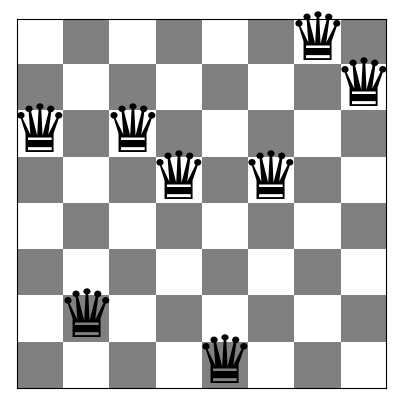

Queens (left to right) are at rows: [2 6 2 3 7 3 0 1]
Number of conflicts: 6


Board with 1 conflicts.


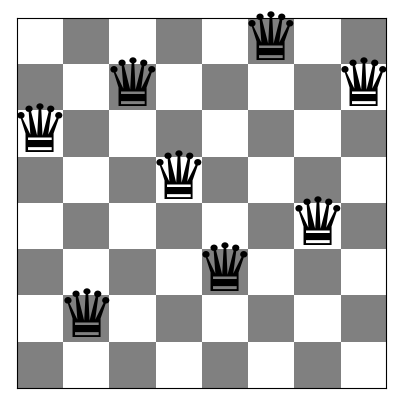

Queens (left to right) are at rows: [2 6 1 3 5 0 4 1]
Number of conflicts: 1


In [27]:
def move_two_queens(board):
    current_board = board
    conflict = conflicts(current_board)
    no_conflicts = False

    while not no_conflicts:
        # Optimal solution = no conflicts or board has no conflicts
        if conflicts(current_board) == 0:
            return current_board

        move = current_board.copy()
        found_better_move = False

        # Iterate over all unique pairs of columns
        for col1 in range(len(board)):
            for col2 in range(col1 + 1, len(board)):
                # Try moving each queen in the selected columns to every other row
                for row1 in range(len(board)):
                    for row2 in range(len(board)):
                        if current_board[col1] == row1 or current_board[col2] == row2:
                            continue  # Skip if no change in row for either queen
                        
                        new_board = current_board.copy()
                        new_board[col1], new_board[col2] = row1, row2
                        
                        if conflicts(new_board) < conflicts(move):
                            move = new_board
                            found_better_move = True

        # If there is no better move stop
        if not found_better_move or conflicts(move) >= conflict:
            no_conflicts = True

        current_board = move
        conflict = conflicts(current_board)

    return current_board


board = random_board(8)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
board = move_two_queens(board)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")



Board with 5 conflicts.


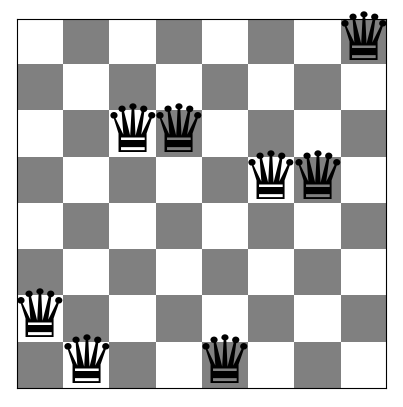

Queens (left to right) are at rows: [6 7 2 2 7 3 3 0]
Number of conflicts: 5


First Choice Hill Climb Average Conflicts: 1.25
First Choice Hill Climb Average Runtime: 0.00941694974899292
First Choice Hill Climb Optimal Solution %: 17.0%


Board with 8 conflicts.


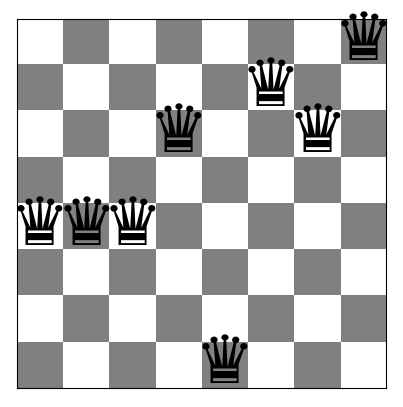

Queens (left to right) are at rows: [4 4 4 2 7 1 2 0]
Number of conflicts: 8


Move Queen One Square at a Time Average Conflicts: 1.25
Move Queen One Square at a Time Average Runtime: 0.0007866191864013672
Move Queen One Square at a Time Optimal Solution %: 0.0%


Board with 8 conflicts.


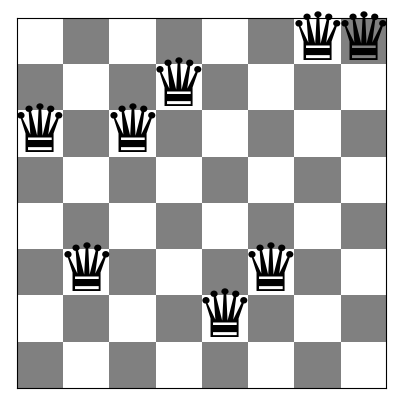

Queens (left to right) are at rows: [2 5 2 1 6 5 0 0]
Number of conflicts: 8


Swap Two Columns Average Conflicts: 4.44
Swap Two Columns Average Runtime: 0.0011868143081665038
Swap Two Columns Optimal Solution %: 0.0%


Board with 8 conflicts.


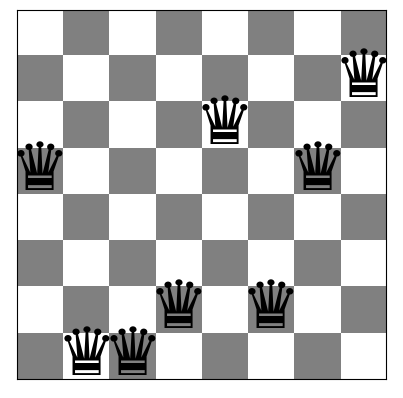

Queens (left to right) are at rows: [3 7 7 6 2 6 3 1]
Number of conflicts: 8


Move Two Queens Average Conflicts: 0.77
Move Two Queens Average Runtime: 0.06734979391098023
Move Two Queens Optimal Solution %: 28.999999999999996%


In [58]:
import time

stochasic_hill_2_runtime = 0
stochasic_hill_2_avg_conflicts = 0
stochasic_hill_2_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = first_choice_hill_climbing(board)
    new_conflicts = conflicts(board)
    stochasic_hill_2_runtime += (time.time() - start_time)
    stochasic_hill_2_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        stochasic_hill_2_optimal += 1

stochasic_hill_2_avg_conflicts = stochasic_hill_2_avg_conflicts/100
stochasic_hill_2_runtime = stochasic_hill_2_runtime/100
stochasic_hill_2_optimal = stochasic_hill_2_optimal/100
print(f"First Choice Hill Climb Average Conflicts: {stochasic_hill_2_avg_conflicts}")
print(f"First Choice Hill Climb Average Runtime: {stochasic_hill_2_runtime}")
print(f"First Choice Hill Climb Optimal Solution %: {stochasic_hill_2_optimal * 100}%")

move_queen_once_avg_runtime = 0
move_queen_once_avg_conflicts = 0
move_queen_once_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = move_queen_once(board)
    new_conflicts = conflicts(board)
    move_queen_once_avg_runtime += (time.time() - start_time)
    move_queen_once_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        move_queen_once_optimal += 1

move_queen_once_avg_conflicts = move_queen_once_avg_conflicts/100
move_queen_once_avg_runtime = move_queen_once_avg_runtime/100
move_queen_once_optimal = move_queen_once_optimal/100
print(f"Move Queen One Square at a Time Average Conflicts: {stochasic_hill_2_avg_conflicts}")
print(f"Move Queen One Square at a Time Average Runtime: {move_queen_once_avg_runtime}")
print(f"Move Queen One Square at a Time Optimal Solution %: {move_queen_once_optimal * 100}%")

swap_columns_avg_runtime = 0
swap_columns_avg_conflicts = 0
swap_columns_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = swap_two_columns(board)
    new_conflicts = conflicts(board)
    swap_columns_avg_runtime += (time.time() - start_time)
    swap_columns_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        swap_columns_optimal += 1

swap_columns_avg_conflicts = swap_columns_avg_conflicts/100
swap_columns_avg_runtime = swap_columns_avg_runtime/100
swap_columns_optimal = swap_columns_optimal/100
print(f"Swap Two Columns Average Conflicts: {swap_columns_avg_conflicts}")
print(f"Swap Two Columns Average Runtime: {swap_columns_avg_runtime}")
print(f"Swap Two Columns Optimal Solution %: {swap_columns_optimal * 100}%")

move_two_queens_avg_runtime = 0
move_two_queens_avg_conflicts = 0
move_two_queens_optimal = 0

print("\n")
board = random_board(8)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")
print("\n")
for i in range(100):
    board = random_board(8)
    start_time = time.time()
    board = move_two_queens(board)
    new_conflicts = conflicts(board)
    move_two_queens_avg_runtime += (time.time() - start_time)
    move_two_queens_avg_conflicts += new_conflicts
    if(new_conflicts == 0):
        move_two_queens_optimal += 1

move_two_queens_avg_conflicts = move_two_queens_avg_conflicts/100
move_two_queens_avg_runtime = move_two_queens_avg_runtime/100
move_two_queens_optimal = move_two_queens_optimal/100
print(f"Move Two Queens Average Conflicts: {move_two_queens_avg_conflicts}")
print(f"Move Two Queens Average Runtime: {move_two_queens_avg_runtime}")
print(f"Move Two Queens Optimal Solution %: {move_two_queens_optimal * 100}%")

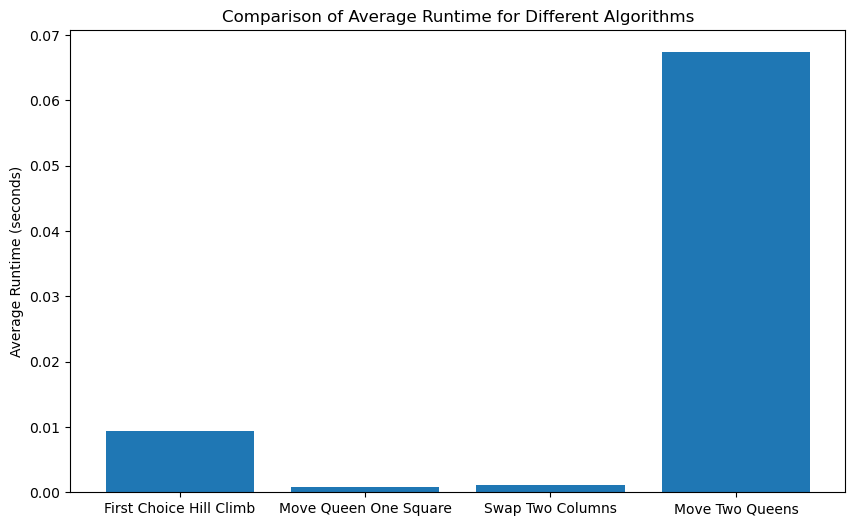

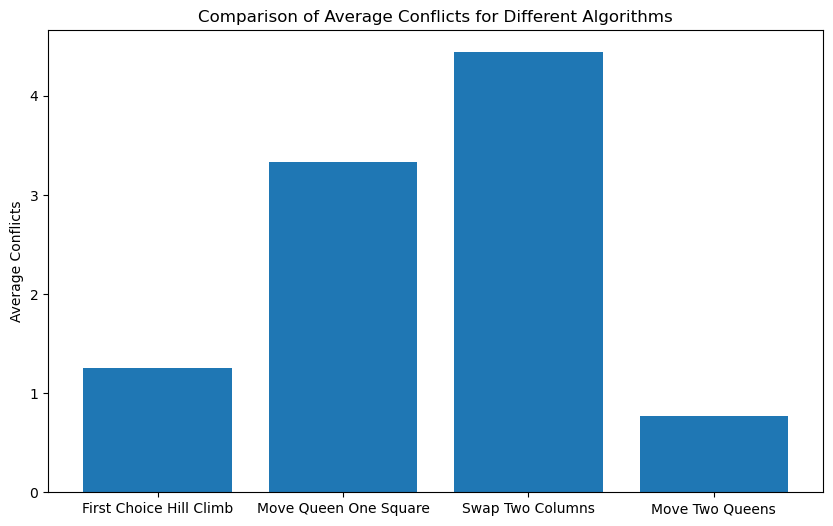

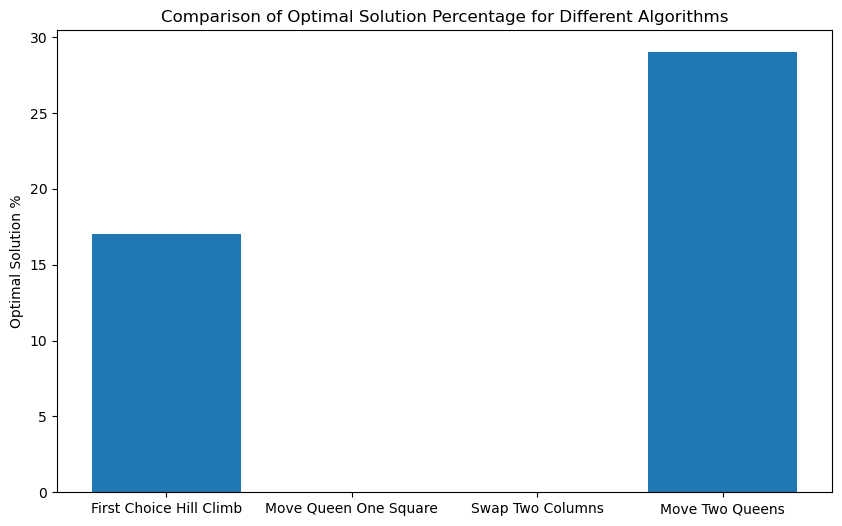

In [60]:
import matplotlib.pyplot as plt
algorithms = [
    "First Choice Hill Climb",
    "Move Queen One Square",
    "Swap Two Columns",
    "Move Two Queens"
]

average_conflicts = [
    stochasic_hill_2_avg_conflicts,
    move_queen_once_avg_conflicts,
    swap_columns_avg_conflicts,
    move_two_queens_avg_conflicts
]

average_runtime = [
    stochasic_hill_2_runtime,
    move_queen_once_avg_runtime,
    swap_columns_avg_runtime,
    move_two_queens_avg_runtime
]

optimal_solutions = [
    stochasic_hill_2_optimal * 100,
    move_queen_once_optimal * 100,
    swap_columns_optimal * 100,
    move_two_queens_optimal * 100
]

# Plot average runtime
plt.figure(figsize=(10, 6))
plt.bar(algorithms, average_runtime)
plt.ylabel("Average Runtime (seconds)")
plt.title("Comparison of Average Runtime for Different Algorithms")
plt.show()

# Plot average conflicts
plt.figure(figsize=(10, 6))
plt.bar(algorithms, average_conflicts)
plt.ylabel("Average Conflicts")
plt.title("Comparison of Average Conflicts for Different Algorithms")
plt.show()

# Plot optimal percentage
plt.figure(figsize=(10, 6))
plt.bar(algorithms, optimal_solutions)
plt.ylabel("Optimal Solution %")
plt.title("Comparison of Optimal Solution Percentage for Different Algorithms")
plt.show()


I have decided to run each algorithm 100 times on a 8 X 8 board, and getting the average runtime, average number of conflicts, and number of optimal solutions

Taking a look at the graphs comparing Stochastic Hill Climbing 2(First Choice Hill Climb) against the three different local moves, we see that the algorithm that moves more than one queen at a time gets the highest number of optimal solutions in 100 runs, as well as the lowest average conflicst over 100 runs. It does get the highest average runtime due to having more complex moves compared to the other algorithms. Switching two columns performs the worst out of all 4 algorithms, with 0 optimal solutions found and the highest average conflict. Movving the Queen one square at a time seems to perform in the middle, with it also having 0 optimal solutions, but a lower average conflicts per 100 runs compared to switching 2 columns and a faster average run time. 

I believe that in scenarios where faster run time and lower average conflicts is preferred, First Choice Hill Climb is the most optimal algorithm to use because it has a much faster runtime compared to moving more than one queen at a time while still having a comparable average number of conflicts and a decent amount of optimal solutions per 100 run.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here